# Iterator
값을 차례대로 꺼낼 수 있는 객체 입니다.

- for 반복문을 사용할때 range를 사용했었습니다. range는 0부터 99까지의 값을 차례대로 꺼낼 수 있는 이터레이터를 하나만 만들어 냅니다.
- 만약 연속한 숫자를 미리 만들면 숫자가 많을때 메모리를 많이 사용하게 됩니다. 그래서 파이썬은 이터레이터만 생성하고 값이 필요한 시점이 되었을 때 값을 만드는 방식을 사용합니다. 데이터 생성을 미루는 것인데 이를 lazy evaluation이라고 합니다.(지연 평가)

#### 반복 가능한 객체?
반복 가능한 객체는 말 그대로 반복할 수 있는 객체인데 우리가 흔히 사용하는 문자열, 리스트, 딕셔너리, 세트가 반복 가능한 객체입니다. 즉, 요소가 여러 개 들어있고, 한 번에 하나씩 꺼낼 수 있는 객체입니다.
<br/>

객체가 반복 가능한 객체인지 알아보는 방법은 객체에 __iter__ 메서드가 들어있는지 확인해보면 됩니다. 다음과 같이 dir 함수를 사용하면 객체의 메서드를 확인할 수 있습니다.

In [1]:
dir([1,2,3])

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [6]:
it = [1,2,3].__iter__()
it.__next__()
it.__next__()
it.__next__()

3

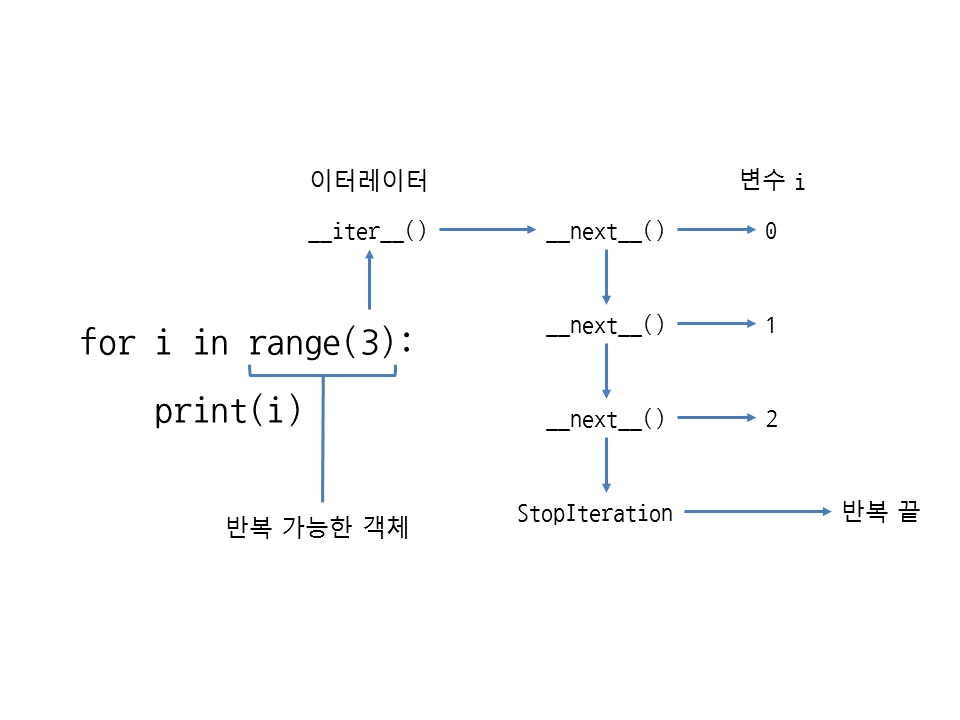

특히 `__iter__, __next__` 를 가진 객체를 이터레이터 프로토콜(iterator protocol)을 지원한다고 말합니다.
반복 가능한 객체는 요소를 한 번에 하나씩 가져올 수 있는 객체이고, 이터레이터는 `__next__`메서드로 하나씩 커낼수 있습니다.
<br/>

반복 가능한 객체와 이터레이터는 별개의 객체입니다. 반복 가능한 객체에서 `__iter__` 메서드로 이터레이터를 얻습니다

In [7]:
class Counter:
    def __init__(self, stop):
        self.current =0 # 현재 숫자 유자, 0부터 지정된 숫자 직전까지 반복
        self.stop = stop # 반복을 끝낼 숫자
    
    def __iter__(self):
        return self # 현재 인스턴스를 반환
    
    def __next__(self):
        if self.current < self.stop: # 현재 숫자가 반복을 끝낼 숫자보다 작을때
            r = self.current # 반환할 숫자를 변수에 저장
            self.current += 1 # 현재 숫자를 1 증가시킴
            return r # 숫자를 반환
        else:
            raise StopIteration # 예외발생시

for i in Counter(3):
    print(i, end='')

012

In [8]:
a,b,c = Counter(3)

In [9]:
a,b,c

(0, 1, 2)

### Index로 접근가능한 iterator

In [10]:
class Counter:
    def __init__(self, stop):
        self.stop = stop
        
    def __getitem__(self,index):  # 인덱스를 받음
        if index < self.stop:     # 인덱스가 반복을 끝낼 숫자보다 작다면     
            return index          # 인덱스를 변환
        else:                     # 인덱스가 반복을 끝낼 숫자보다 크거나 같다면
            raise IndexError      # 에러발생

print(Counter(3)[0],Counter(3)[1],Counter(3)[2])

for i in Counter(3):
    print(i,end='')

0 1 2
012

# Generator

제너레이터는 이터레이터를 생성해주는 함수 입니다. 제너레이터는 yield 라는 키워드만 사용하면 간단하게 이터레이터를 만들어 줍니다.

In [11]:
def number_generator():
    yield 0
    yield 1
    yield 2

for i in number_generator():
    print(i)

0
1
2


In [13]:
dir(number_generator())

['__class__',
 '__del__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__next__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'close',
 'gi_code',
 'gi_frame',
 'gi_running',
 'gi_yieldfrom',
 'send',
 'throw']

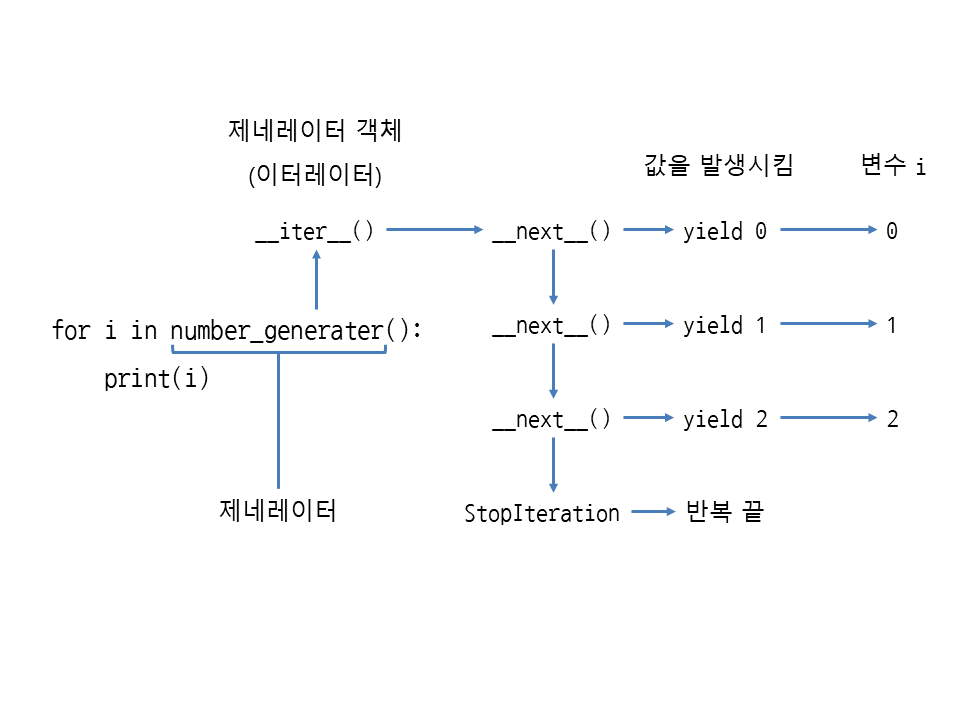

In [14]:
def number_generator(stop):
    n =0
    while n < stop:
        yield n
        n += 1
for i in number_generator(3):
    print(i)

0
1
2


In [16]:
def upper_generator(x):
    for i in x:
        yield i.upper()    # 함수의 반환값을 바깥으로 전달

fruits = ['apple', 'pear', 'grape', 'pineapple', 'orange']
for i in upper_generator(fruits):
    print(i)

APPLE
PEAR
GRAPE
PINEAPPLE
ORANGE
